# Assignment 1 

## Problem 1 

### Regularization. Using the accompanying Hitters dataset, we will explore regression models to predict a player’s Salary from other variables. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
hitters = pd.read_csv('Hitters.csv')
hitters
#Read the data

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,-Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,-Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,-Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
hitters = hitters.drop(["Unnamed: 0"],axis=1)
hitters = hitters.dropna()
hitters
#Remove the name and NA data

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [7]:
hitters1 = hitters.drop(['League','Division','NewLeague'],axis=1)
#Remove the non numeric variables.

In [8]:
x = hitters1.drop('Salary',axis=1)
y = hitters1['Salary']

### 1.1
### Use LASSO regression to predict Salary from the other numeric predictors.Create a visualization of the coefficient trajectories. 
### Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. 
### How many predictors are left in that model?

In [14]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale

In [10]:
alphas = 10**np.linspace(-2,10,100)
alphas
#Set the alphas.

array([1.00000000e-02, 1.32194115e-02, 1.74752840e-02, 2.31012970e-02,
       3.05385551e-02, 4.03701726e-02, 5.33669923e-02, 7.05480231e-02,
       9.32603347e-02, 1.23284674e-01, 1.62975083e-01, 2.15443469e-01,
       2.84803587e-01, 3.76493581e-01, 4.97702356e-01, 6.57933225e-01,
       8.69749003e-01, 1.14975700e+00, 1.51991108e+00, 2.00923300e+00,
       2.65608778e+00, 3.51119173e+00, 4.64158883e+00, 6.13590727e+00,
       8.11130831e+00, 1.07226722e+01, 1.41747416e+01, 1.87381742e+01,
       2.47707636e+01, 3.27454916e+01, 4.32876128e+01, 5.72236766e+01,
       7.56463328e+01, 1.00000000e+02, 1.32194115e+02, 1.74752840e+02,
       2.31012970e+02, 3.05385551e+02, 4.03701726e+02, 5.33669923e+02,
       7.05480231e+02, 9.32603347e+02, 1.23284674e+03, 1.62975083e+03,
       2.15443469e+03, 2.84803587e+03, 3.76493581e+03, 4.97702356e+03,
       6.57933225e+03, 8.69749003e+03, 1.14975700e+04, 1.51991108e+04,
       2.00923300e+04, 2.65608778e+04, 3.51119173e+04, 4.64158883e+04,
      

In [18]:
coefs=[]
for i in alphas:
    lasso=Lasso(alpha = i,max_iter = 10000, normalize = True)
    lasso.fit(scale(x), y)
    coefs.append(lasso.coef_)

Text(0.5, 1.0, 'Lasso Coefficients Trajectory')

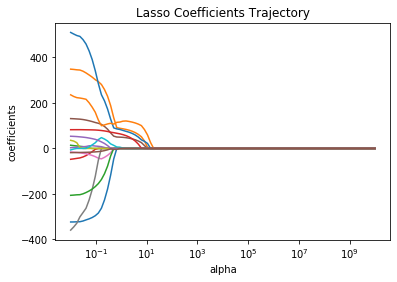

In [19]:
# Visualize coeffecient trajectories
import matplotlib.pyplot as plt    
fig1 = plt.gca()
fig1.plot(alphas, coefs)
fig1.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso Coefficients Trajectory')

In [21]:
#From the plot we can see that when alpha is around 10, they will be the last some varaibles.
model2 = Lasso(alpha = 10, max_iter = 10000, normalize = True).fit(x,y)
coefframe = pd.Series(model2.coef_, index=x.columns)
coefframe
# We can see that the final three predictors are 'Hits','CRuns' and 'CRBI'.

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64

In [25]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(scale(x), y)
lassocv.alpha_
# The optimal vaule of the regularization penalty here is 0.0635.

0.0635481759985745

In [33]:
model3 = Lasso(alpha=lassocv.alpha_,max_iter = 100000, normalize = True).fit(x, y)
print(pd.Series(model3.coef_, index=x.columns))
#There 14 predictors left in this model(contain 'errors') .

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64


## 1.2
### Repeat with Ridge Regression. Visualize coeffecient trajectories. Use crossvalidation to find the optimal vaule of the regularization penalty.

In [27]:
from sklearn.linear_model import Ridge,RidgeCV

In [28]:
coefs = []

for a in alphas:
    ridge=Ridge(alpha = a,normalize=True)
    ridge.fit(scale(x), y)
    coefs.append(ridge.coef_)    

Text(0.5, 1.0, 'Ridge Coefficients Trajectory')

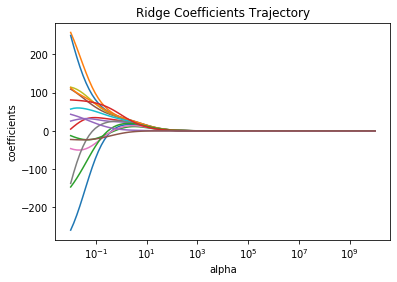

In [29]:
# Visualize coeffecient trajectories
fig2 = plt.gca()
fig2.plot(alphas, coefs)
fig2.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge Coefficients Trajectory')

In [31]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(scale(x),y)
ridgecv.alpha_
# The optimal vaule of the regularization penalty here is 0.01.

0.01

# Problem2
## Short Answer. 
### Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? 
### Make reference to your findings in number (1) to describe models of high/low bias and variance.

#### Bias and variance are used to measure the model's accuracy and precision. However, they represent the different parts of the model. An ideal model is supposed to have both low bias and low variance, but actually we cannot achive it, low bias may bring high variance and low variance can also cause high bias. So the bias-variance tradeoff is a way to keep both of bias and variance relatively low to make the model better, and they may not be the lowest level for themselves. 

#### When we adjust the bias and variance, we may meet an issue called overfitting. The regularzition can help us to prevent this issue. Take Lasso as an example, it will remove the unimportant predictors in the model so the variance will decrease but the bias will increase.

#### From the plot of Lasso and Ridge we can find that, when the penalty parameter(alpha) is small, the coefficients or weights of the predictors are large which will bring large variance and may cause overfitting. When the penalty parameter becomes large, the coefficients will decrease, so the model will have smaller variance and thus prevent overfitting. However, with the increasement of the penalty, the bias of the model will increase, so it is the bias-variance tradeoff.